In [16]:
from IPython.display import display
from IPython.core.display import HTML 

#### Machine Learning process 

<center><img width="600px" height="600px" src="https://raw.githubusercontent.com/martinkearn/Content/master/Blogs/Images/MLProcess.PNG"></center>

In [18]:
# Import libraries needed 
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType, StringType, IntegerType, DoubleType, ArrayType

from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors

from pyspark import AccumulatorParam
from pyspark import Broadcast

import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd

%matplotlib inline

In [19]:
#read the dataset
df = spark.read.csv('covid19.csv', inferSchema=True, header=True)
#view five records
df.show(5)

+---+---------------+---------+-------+---------------+---------+------+---------+-----------+
|SNo|ObservationDate| Province|Country|    Last_Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+---------+-------+---------------+---------+------+---------+-----------+
|  1|     01/22/2020|    Anhui|  China|1/22/2020 17:00|        1|     0|        0|          1|
|  2|     01/22/2020|  Beijing|  China|1/22/2020 17:00|       14|     0|        0|         14|
|  3|     01/22/2020|Chongqing|  China|1/22/2020 17:00|        6|     0|        0|          6|
|  4|     01/22/2020|   Fujian|  China|1/22/2020 17:00|        1|     0|        0|          1|
|  5|     01/22/2020|    Gansu|  China|1/22/2020 17:00|        0|     0|        0|          0|
+---+---------------+---------+-------+---------------+---------+------+---------+-----------+
only showing top 5 rows



In [20]:
#print dataframe columns and count
print(df.columns)
print(df.count())

['SNo', 'ObservationDate', 'Province', 'Country', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active_case']
172480


In [21]:
df.printSchema()

root
 |-- SNo: string (nullable = true)
 |-- ObservationDate: string (nullable = true)
 |-- Province: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Last_Update: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Deaths: string (nullable = true)
 |-- Recovered: string (nullable = true)
 |-- Active_case: integer (nullable = true)



Missing records

In [6]:
from pyspark.sql.functions import isnan, when, count, col

In [22]:
#Check missing value for single column
df.filter(df['Country'].isNull()).show()

+---+---------------+--------+-------+-----------+---------+------+---------+-----------+
|SNo|ObservationDate|Province|Country|Last_Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+--------+-------+-----------+---------+------+---------+-----------+
+---+---------------+--------+-------+-----------+---------+------+---------+-----------+



In [23]:
# Check missing value for all columns
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---------------+--------+-------+-----------+---------+------+---------+-----------+
|SNo|ObservationDate|Province|Country|Last_Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+--------+-------+-----------+---------+------+---------+-----------+
|  0|              0|       0|      0|          0|        0|     0|        0|          0|
+---+---------------+--------+-------+-----------+---------+------+---------+-----------+



In [26]:
# As there were no missing values, the number of records remains the same.
print(df.count())

172480


In [27]:
### check datatypes
df.dtypes

[('SNo', 'string'),
 ('ObservationDate', 'string'),
 ('Province', 'string'),
 ('Country', 'string'),
 ('Last_Update', 'string'),
 ('Confirmed', 'int'),
 ('Deaths', 'string'),
 ('Recovered', 'string'),
 ('Active_case', 'int')]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E86ECAC880>,
      dtype=object)

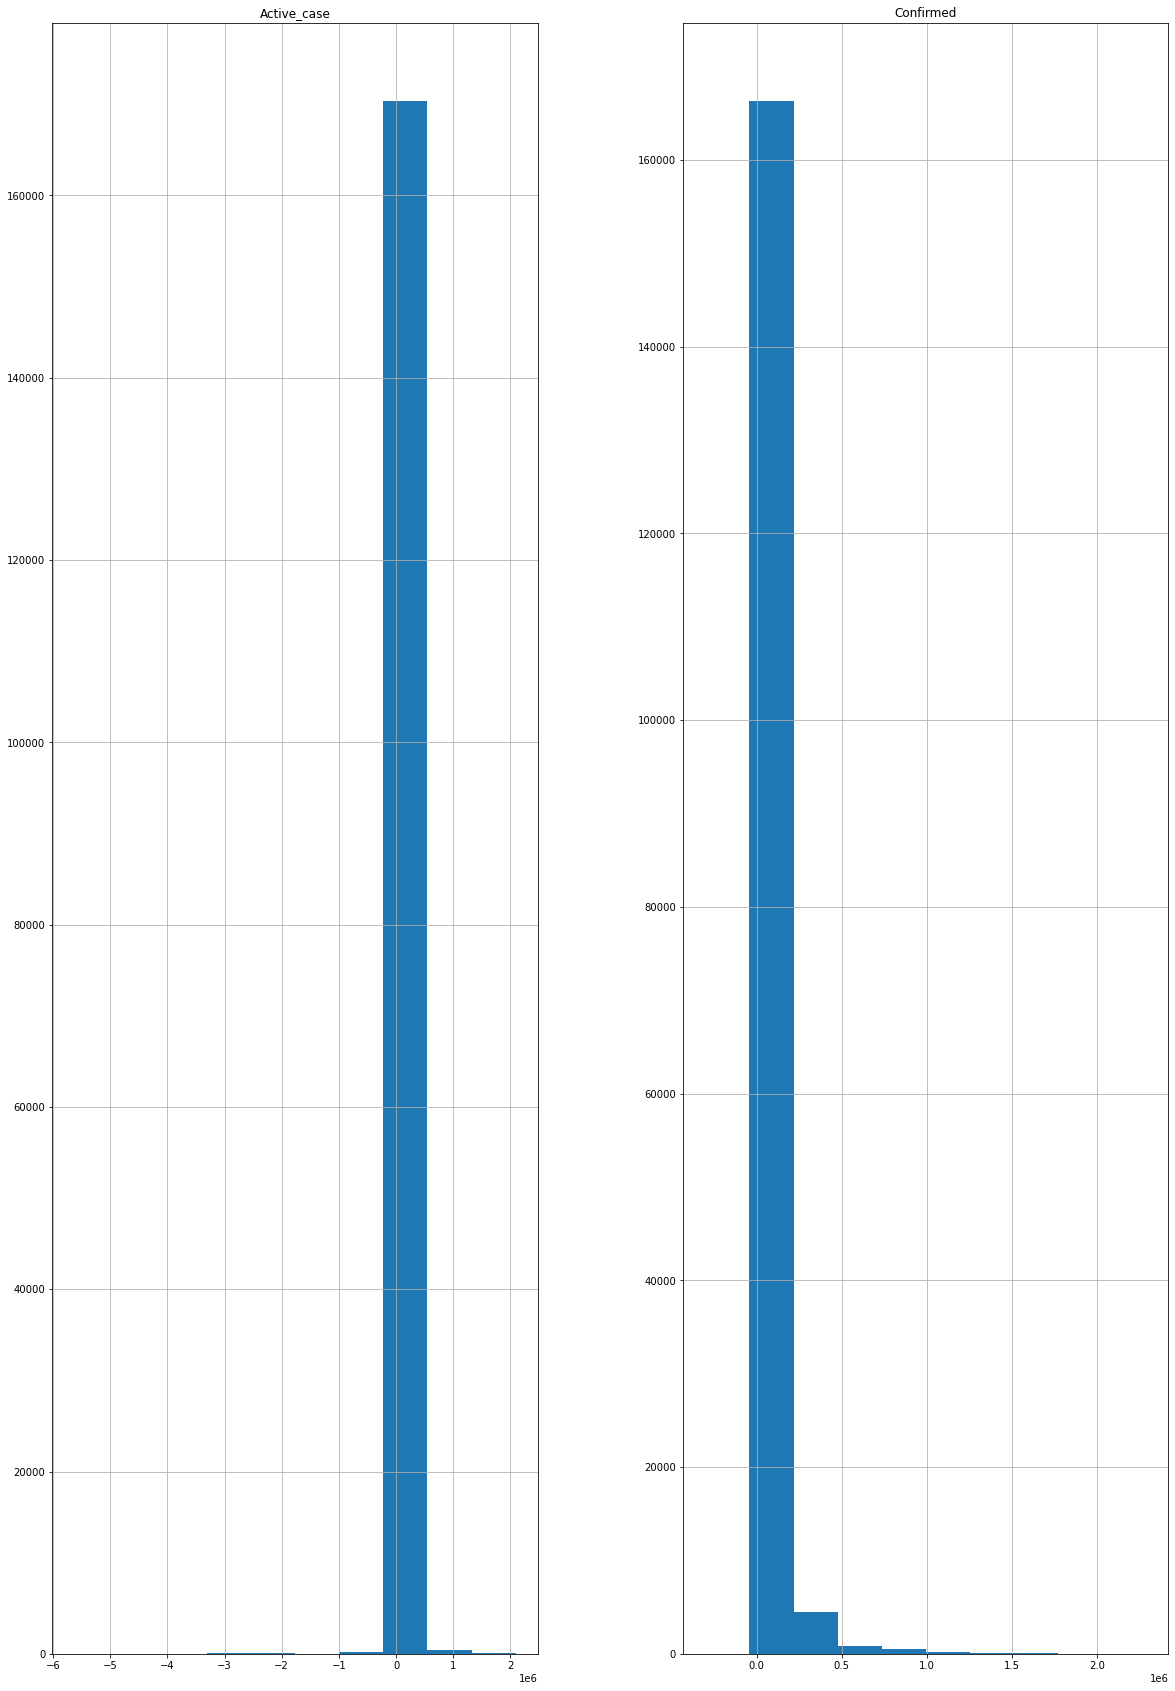

In [29]:
data = df.toPandas()
data.hist(figsize=(20,30))

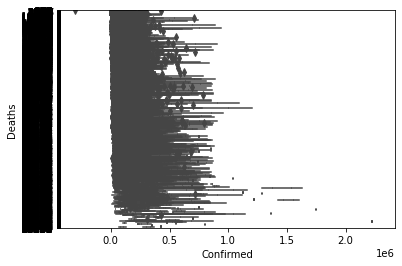

In [33]:
import seaborn as sns
sns.boxplot(x="Confirmed" , y="Deaths" , data=data)

In [36]:
data.cov()

,Confirmed,Active_case
Confirmed,1.063681e+10,4.898514e+09
Active_case,4.898514e+09,1.284470e+10


In [34]:
corr = data.corr()
corr

,Confirmed,Active_case
Confirmed,1.000000,0.417779
Active_case,0.417779,1.000000


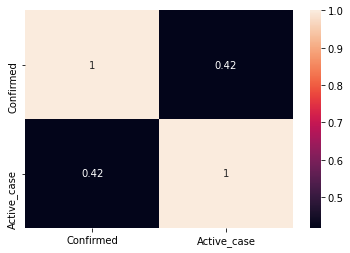

In [35]:
sns.heatmap(corr , annot=True)

In [31]:
  df.select(df.columns[:5]).show(10)

+---+---------------+---------+-------+---------------+
|SNo|ObservationDate| Province|Country|    Last_Update|
+---+---------------+---------+-------+---------------+
|  1|     01/22/2020|    Anhui|  China|1/22/2020 17:00|
|  2|     01/22/2020|  Beijing|  China|1/22/2020 17:00|
|  3|     01/22/2020|Chongqing|  China|1/22/2020 17:00|
|  4|     01/22/2020|   Fujian|  China|1/22/2020 17:00|
|  5|     01/22/2020|    Gansu|  China|1/22/2020 17:00|
|  6|     01/22/2020|Guangdong|  China|1/22/2020 17:00|
|  7|     01/22/2020|  Guangxi|  China|1/22/2020 17:00|
|  8|     01/22/2020|  Guizhou|  China|1/22/2020 17:00|
|  9|     01/22/2020|   Hainan|  China|1/22/2020 17:00|
| 10|     01/22/2020|    Hebei|  China|1/22/2020 17:00|
+---+---------------+---------+-------+---------------+
only showing top 10 rows

